In [5]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3)) # 沒有 head
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
import glob
import pandas as pd
# 先不讀取圖片, 要訓練時才讀圖
df = pd.DataFrame(columns = ['path', 'target'])
for p in glob.glob("./training_set/cats/cat.*.jpg"):
    s = pd.Series([p, 0], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
for p in glob.glob("./training_set/dogs/dog.*.jpg"):
    s = pd.Series([p, 1], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
df

,path,target
0,./training_set/cats\cat.1.jpg,0
1,./training_set/cats\cat.10.jpg,0
2,./training_set/cats\cat.100.jpg,0
3,./training_set/cats\cat.1000.jpg,0
4,./training_set/cats\cat.1001.jpg,0
...,...,...
8000,./training_set/dogs\dog.995.jpg,1
8001,./training_set/dogs\dog.996.jpg,1
8002,./training_set/dogs\dog.997.jpg,1
8003,./training_set/dogs\dog.998.jpg,1


./training_set/dogs\dog.373.jpg
(350, 232)


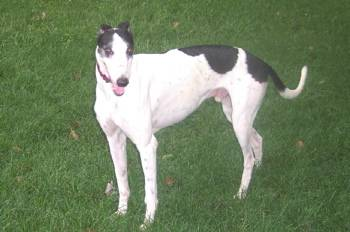

In [26]:
from keras.preprocessing.image import load_img
import random
c = random.randint(0, df.shape[0])
print(df['path'][c])
img = load_img(df['path'][c])
print(img.size)
img 

(224, 224)


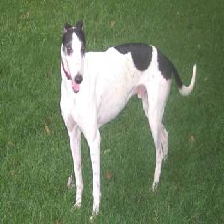

In [27]:
img = load_img(df['path'][c], target_size= (224, 224)) # 將圖片縮小成固定大小
print(img.size)
img 

In [36]:
from keras.models import Model
from keras.layers import Flatten, Dense
x = Flatten()(vgg16.output)
x = Dense(units = 2048, activation='relu')(x)
x = Dense(units = 256, activation='relu')(x)
# 貓狗分類
x = Dense(units = 2, activation='softmax')(x)
cnn = Model(inputs=vgg16.input, outputs=x)
cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
vgg